In [1]:
import os
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append("..") 
from gcforest.gcforest import GCForest

#### somte sampling

In [3]:
# def Smoter(X, y, is_random=False):
#     if is_random == True:
#         random_lst = list(np.random.randint(0, 1000, 4))
#     elif is_random == False:
#         random_lst = [0] * 4

#     print("rs:", random_lst)
#     sm = SMOTE(random_state=random_lst[2], kind = 0.24)
#     X_smote, y_smote = sm.fit_sample(X, y)

#     return X_smote, y_smote

# 数据以及参数

In [2]:
random_seed = 42

In [4]:
def get_toy_config():
    config = {}
    ca_config = {}
    ca_config["random_state"] = random_seed
    ca_config["max_layers"] = 20
    ca_config["early_stopping_rounds"] = 5
    ca_config["n_classes"] = 6
    ca_config["estimators"] = []
    ca_config["estimators"].append({"n_folds": 5, "type": "RandomForestClassifier", "random_state" : random_seed})
    ca_config["estimators"].append({"n_folds": 5, "type": "RandomForestClassifier", "random_state" : random_seed})
    ca_config["estimators"].append({"n_folds": 5, "type": "RandomForestClassifier", "random_state" : random_seed})
    ca_config["estimators"].append({"n_folds": 5, "type": "RandomForestClassifier", "random_state" : random_seed})
    ca_config["estimators"].append({"n_folds": 5, "type": "DecisionTreeClassifier"})
    ca_config["estimators"].append({"n_folds": 5, "type": "DecisionTreeClassifier"})
    ca_config["estimators"].append({"n_folds": 5, "type": "DecisionTreeClassifier"})
    ca_config["estimators"].append({"n_folds": 5, "type": "LogisticRegression"})
    config["cascade"] = ca_config
    return config

In [5]:
path = os.getcwd()+'/../data/20122018freshwater_four_feature.csv'
data = pd.read_csv(path, na_values = np.nan)

pH             float64
DO(mg/l)       float64
CODMn(mg/l)    float64
NH3-N(mg/l)    float64
本周水质             int64
dtype: object
(33612, 5)


In [ ]:
# training/valid/test: 0.6/0.2/0.2, 各数据集划分的时候要注意
X = data.drop(['本周水质'], axis=1).values # Series
y = data['本周水质'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                       stratify = y, random_state = random_seed)
# Z-score
clean_pipeline = Pipeline([('imputer', preprocessing.Imputer(missing_values='NaN',strategy="median")),
                           ('std_scaler', preprocessing.StandardScaler()),])
X_train = clean_pipeline.fit_transform(X_train)
X_test = clean_pipeline.fit_transform(X_test)
X_train2, X_valid, y_train2, y_valid = train_test_split(X_train, y_train, test_size=0.25, 
                                       stratify = y_train, random_state = random_seed)
X_train = X_train2
y_train = y_train2

In [8]:
data_four_features.head()

,pH,DO(mg/l),CODMn(mg/l),NH3-N(mg/l),本周水质
0,7.09,10.0,5.7,0.33,3
1,6.94,12.0,5.4,0.40,3
2,7.20,9.6,4.9,0.34,3
3,6.80,11.6,6.3,0.59,4
4,6.75,11.0,6.2,0.64,4


# Base Model Pre-train

In [10]:
clean_pipeline = Pipeline([('imputer', preprocessing.Imputer(missing_values='NaN',strategy="median")),
                           ('std_scaler', preprocessing.StandardScaler()),])
X_train = clean_pipeline.fit_transform(X_train)
X_test = clean_pipeline.fit_transform(X_test)

In [11]:
X_train2, X_valid, y_train2, y_valid = train_test_split(X_train, y_train, test_size=0.25, 
                                       stratify = y_train, random_state = random_seed)

load gc config

In [12]:
y_train2 = y_train2.values
y_train = y_train.values
y_valid = y_valid.values
y_test = y_test.values

In [90]:
config = get_toy_config()
model = GCForest(config)

model.fit_transform(X_train2, y_train2, X_test, y_test)
gc_valid_proba = model.predict_proba(X_valid)
gc_pred = model.predict(X_valid)

[ 2018-12-16 21:31:16,209][cascade_classifier.fit_transform] X_groups_train.shape=[(20166, 4)],y_train.shape=(20166,),X_groups_test.shape=[(6723, 4)],y_test.shape=(6723,)
[ 2018-12-16 21:31:16,214][cascade_classifier.fit_transform] group_dims=[4]
[ 2018-12-16 21:31:16,216][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-12-16 21:31:16,217][cascade_classifier.fit_transform] group_ends=[4]
[ 2018-12-16 21:31:16,219][cascade_classifier.fit_transform] X_train.shape=(20166, 4),X_test.shape=(6723, 4)
[ 2018-12-16 21:31:16,224][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(20166, 4), X_cur_test.shape=(6723, 4)
[ 2018-12-16 21:31:16,399][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_0 - estimator_0 - 5_folds.train_0.predict)=99.28%
[ 2018-12-16 21:31:16,535][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_0 - estimator_0 - 5_folds.train_1.predict)=99.41%
[ 2018-12-16 21:31:16,673][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_0 - estimat

[ 2018-12-16 21:31:20,315][cascade_classifier.fit_transform] [layer=1] look_indexs=[0], X_cur_train.shape=(20166, 52), X_cur_test.shape=(6723, 52)
[ 2018-12-16 21:31:20,559][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_1 - estimator_0 - 5_folds.train_0.predict)=99.45%
[ 2018-12-16 21:31:20,757][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_1 - estimator_0 - 5_folds.train_1.predict)=99.53%
[ 2018-12-16 21:31:20,952][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_1 - estimator_0 - 5_folds.train_2.predict)=99.58%
[ 2018-12-16 21:31:21,136][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_1 - estimator_0 - 5_folds.train_3.predict)=99.23%
[ 2018-12-16 21:31:21,322][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_1 - estimator_0 - 5_folds.train_4.predict)=99.40%
[ 2018-12-16 21:31:21,334][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_1 - estimator_0 - 5_folds.train_cv.predict)=99.44%
[ 2018-12-16 21:31:21,338][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_1 - es

[ 2018-12-16 21:31:31,157][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_2 - estimator_0 - 5_folds.train_cv.predict)=99.46%
[ 2018-12-16 21:31:31,162][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_2 - estimator_0 - 5_folds.test.predict)=97.65%
[ 2018-12-16 21:31:31,401][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_2 - estimator_1 - 5_folds.train_0.predict)=99.31%
[ 2018-12-16 21:31:31,572][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_2 - estimator_1 - 5_folds.train_1.predict)=99.38%
[ 2018-12-16 21:31:31,818][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_2 - estimator_1 - 5_folds.train_2.predict)=99.63%
[ 2018-12-16 21:31:32,001][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_2 - estimator_1 - 5_folds.train_3.predict)=99.60%
[ 2018-12-16 21:31:32,263][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_2 - estimator_1 - 5_folds.train_4.predict)=99.33%
[ 2018-12-16 21:31:32,281][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_2 - estimator_1 - 5_folds.tr

[ 2018-12-16 21:31:42,454][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_3 - estimator_1 - 5_folds.train_4.predict)=99.50%
[ 2018-12-16 21:31:42,466][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_3 - estimator_1 - 5_folds.train_cv.predict)=99.44%
[ 2018-12-16 21:31:42,469][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_3 - estimator_1 - 5_folds.test.predict)=97.65%
[ 2018-12-16 21:31:42,739][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_3 - estimator_2 - 5_folds.train_0.predict)=99.45%
[ 2018-12-16 21:31:42,985][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_3 - estimator_2 - 5_folds.train_1.predict)=99.31%
[ 2018-12-16 21:31:43,165][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_3 - estimator_2 - 5_folds.train_2.predict)=99.41%
[ 2018-12-16 21:31:43,349][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_3 - estimator_2 - 5_folds.train_3.predict)=99.70%
[ 2018-12-16 21:31:43,564][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_3 - estimator_2 - 5_folds.tr

[ 2018-12-16 21:31:53,190][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_4 - estimator_2 - 5_folds.train_3.predict)=99.23%
[ 2018-12-16 21:31:53,364][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_4 - estimator_2 - 5_folds.train_4.predict)=99.43%
[ 2018-12-16 21:31:53,376][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_4 - estimator_2 - 5_folds.train_cv.predict)=99.45%
[ 2018-12-16 21:31:53,379][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_4 - estimator_2 - 5_folds.test.predict)=97.65%
[ 2018-12-16 21:31:53,580][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_4 - estimator_3 - 5_folds.train_0.predict)=99.48%
[ 2018-12-16 21:31:53,804][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_4 - estimator_3 - 5_folds.train_1.predict)=99.31%
[ 2018-12-16 21:31:53,983][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_4 - estimator_3 - 5_folds.train_2.predict)=99.53%
[ 2018-12-16 21:31:54,162][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_4 - estimator_3 - 5_folds.tr

[ 2018-12-16 21:32:02,415][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_5 - estimator_3 - 5_folds.train_2.predict)=99.53%
[ 2018-12-16 21:32:02,587][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_5 - estimator_3 - 5_folds.train_3.predict)=99.41%
[ 2018-12-16 21:32:02,778][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_5 - estimator_3 - 5_folds.train_4.predict)=99.58%
[ 2018-12-16 21:32:02,795][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_5 - estimator_3 - 5_folds.train_cv.predict)=99.45%
[ 2018-12-16 21:32:02,798][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_5 - estimator_3 - 5_folds.test.predict)=97.65%
[ 2018-12-16 21:32:03,001][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_5 - estimator_4 - 5_folds.train_0.predict)=98.93%
[ 2018-12-16 21:32:03,170][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_5 - estimator_4 - 5_folds.train_1.predict)=98.81%
[ 2018-12-16 21:32:03,341][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_5 - estimator_4 - 5_folds.tr

[ 2018-12-16 21:32:11,807][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_6 - estimator_4 - 5_folds.train_1.predict)=98.69%
[ 2018-12-16 21:32:12,006][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_6 - estimator_4 - 5_folds.train_2.predict)=98.84%
[ 2018-12-16 21:32:12,273][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_6 - estimator_4 - 5_folds.train_3.predict)=98.88%
[ 2018-12-16 21:32:12,503][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_6 - estimator_4 - 5_folds.train_4.predict)=98.86%
[ 2018-12-16 21:32:12,511][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_6 - estimator_4 - 5_folds.train_cv.predict)=98.79%
[ 2018-12-16 21:32:12,514][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_6 - estimator_4 - 5_folds.test.predict)=97.58%
[ 2018-12-16 21:32:12,757][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_6 - estimator_5 - 5_folds.train_0.predict)=98.86%
[ 2018-12-16 21:32:12,944][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_6 - estimator_5 - 5_folds.tr

[ 2018-12-16 21:32:21,888][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_7 - estimator_5 - 5_folds.train_0.predict)=98.81%
[ 2018-12-16 21:32:22,070][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_7 - estimator_5 - 5_folds.train_1.predict)=98.66%
[ 2018-12-16 21:32:22,269][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_7 - estimator_5 - 5_folds.train_2.predict)=98.76%
[ 2018-12-16 21:32:22,470][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_7 - estimator_5 - 5_folds.train_3.predict)=98.48%
[ 2018-12-16 21:32:22,640][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_7 - estimator_5 - 5_folds.train_4.predict)=98.84%
[ 2018-12-16 21:32:22,646][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_7 - estimator_5 - 5_folds.train_cv.predict)=98.71%
[ 2018-12-16 21:32:22,649][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_7 - estimator_5 - 5_folds.test.predict)=97.56%
[ 2018-12-16 21:32:22,850][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_7 - estimator_6 - 5_folds.tr

[ 2018-12-16 21:32:31,523][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_8 - estimator_5 - 5_folds.test.predict)=97.50%
[ 2018-12-16 21:32:31,714][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_8 - estimator_6 - 5_folds.train_0.predict)=98.93%
[ 2018-12-16 21:32:31,926][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_8 - estimator_6 - 5_folds.train_1.predict)=98.91%
[ 2018-12-16 21:32:32,144][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_8 - estimator_6 - 5_folds.train_2.predict)=98.68%
[ 2018-12-16 21:32:32,322][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_8 - estimator_6 - 5_folds.train_3.predict)=98.88%
[ 2018-12-16 21:32:32,512][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_8 - estimator_6 - 5_folds.train_4.predict)=98.79%
[ 2018-12-16 21:32:32,519][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_8 - estimator_6 - 5_folds.train_cv.predict)=98.84%
[ 2018-12-16 21:32:32,522][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_8 - estimator_6 - 5_folds.te

[ 2018-12-16 21:32:43,237][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_9 - estimator_6 - 5_folds.train_cv.predict)=98.73%
[ 2018-12-16 21:32:43,240][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_9 - estimator_6 - 5_folds.test.predict)=97.60%
[ 2018-12-16 21:32:44,012][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_9 - estimator_7 - 5_folds.train_0.predict)=99.50%
[ 2018-12-16 21:32:44,504][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_9 - estimator_7 - 5_folds.train_1.predict)=99.50%
[ 2018-12-16 21:32:45,058][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_9 - estimator_7 - 5_folds.train_2.predict)=99.38%
[ 2018-12-16 21:32:45,588][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_9 - estimator_7 - 5_folds.train_3.predict)=99.53%
[ 2018-12-16 21:32:46,119][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_9 - estimator_7 - 5_folds.train_4.predict)=99.25%
[ 2018-12-16 21:32:46,129][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_9 - estimator_7 - 5_folds.tr

[ 2018-12-16 21:32:55,906][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_10 - estimator_7 - 5_folds.train_3.predict)=99.45%
[ 2018-12-16 21:32:56,511][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_10 - estimator_7 - 5_folds.train_4.predict)=99.55%
[ 2018-12-16 21:32:56,520][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_10 - estimator_7 - 5_folds.train_cv.predict)=99.44%
[ 2018-12-16 21:32:56,525][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_10 - estimator_7 - 5_folds.test.predict)=97.65%
[ 2018-12-16 21:32:56,534][cascade_classifier.calc_f1] Weighted F1 (layer_10 - train.classifier_average)=99.43%
[ 2018-12-16 21:32:56,538][cascade_classifier.calc_f1] Weighted F1 (layer_10 - test.classifier_average)=97.66%
[ 2018-12-16 21:32:56,541][cascade_classifier.fit_transform] [Result][Optimal Level Detected] opt_layer_num=6, weighted_f1_train=99.45%, weighted_f1_test=97.65%
[ 2018-12-16 21:32:56,557][cascade_classifier.transform] X_groups_test.shape=[(6723, 4)]
[ 2018-12-16 

In [14]:
models = [
    LogisticRegression(),
    LinearDiscriminantAnalysis(),
    SVC(probability=True),
    DecisionTreeClassifier(),
    ExtraTreeClassifier(),
    GaussianNB(),
    KNeighborsClassifier(),
    RandomForestClassifier(random_state=random_seed),
    ExtraTreesClassifier(random_state=random_seed),
    GCForest(config)
]

y_pred_proba_all = []

# 训练固定的基学习器
for model in models:
    model_name = model.__class__.__name__
    if model_name == 'GCForest':
        model.fit_transform(X_train2, y_train2, X_test, y_test)
    else:
        model.fit(X_train2, y_train2)
    y_pred_proba = model.predict_proba(X_valid)
    y_pred = model.predict(X_valid)
    print("%s, validation set: weighted F1 score:%f, Accuracy:%f" %(model_name, f1_score(y_valid, y_pred, average="weighted"), accuracy_score(y_valid, y_pred)))
    y_pred_proba_all.append(y_pred_proba)

/Users/alex/anaconda3/envs/gc/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


LogisticRegression, validation set: weighted F1 score:0.618051, Accuracy:0.670683
LinearDiscriminantAnalysis, validation set: weighted F1 score:0.569881, Accuracy:0.619664
SVC, validation set: weighted F1 score:0.886775, Accuracy:0.888443
DecisionTreeClassifier, validation set: weighted F1 score:0.987514, Accuracy:0.987506
ExtraTreeClassifier, validation set: weighted F1 score:0.895863, Accuracy:0.895582
GaussianNB, validation set: weighted F1 score:0.812976, Accuracy:0.814517
KNeighborsClassifier, validation set: weighted F1 score:0.891579, Accuracy:0.892161


[ 2018-12-16 21:02:57,937][cascade_classifier.fit_transform] X_groups_train.shape=[(20166, 4)],y_train.shape=(20166,),X_groups_test.shape=[(6723, 4)],y_test.shape=(6723,)
[ 2018-12-16 21:02:57,939][cascade_classifier.fit_transform] group_dims=[4]
[ 2018-12-16 21:02:57,940][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-12-16 21:02:57,941][cascade_classifier.fit_transform] group_ends=[4]
[ 2018-12-16 21:02:57,942][cascade_classifier.fit_transform] X_train.shape=(20166, 4),X_test.shape=(6723, 4)
[ 2018-12-16 21:02:57,945][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(20166, 4), X_cur_test.shape=(6723, 4)


RandomForestClassifier, validation set: weighted F1 score:0.994051, Accuracy:0.994050
ExtraTreesClassifier, validation set: weighted F1 score:0.973277, Accuracy:0.973375


[ 2018-12-16 21:02:58,121][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_0 - estimator_0 - 5_folds.train_0.predict)=99.28%
[ 2018-12-16 21:02:58,256][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_0 - estimator_0 - 5_folds.train_1.predict)=99.41%
[ 2018-12-16 21:02:58,388][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_0 - estimator_0 - 5_folds.train_2.predict)=99.28%
[ 2018-12-16 21:02:58,526][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_0 - estimator_0 - 5_folds.train_3.predict)=99.43%
[ 2018-12-16 21:02:58,662][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_0 - estimator_0 - 5_folds.train_4.predict)=99.40%
[ 2018-12-16 21:02:58,674][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_0 - estimator_0 - 5_folds.train_cv.predict)=99.36%
[ 2018-12-16 21:02:58,677][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_0 - estimator_0 - 5_folds.test.predict)=97.63%
[ 2018-12-16 21:02:58,826][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_0 - estimator_1 - 5_folds.tr

[ 2018-12-16 21:03:02,977][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_1 - estimator_0 - 5_folds.train_4.predict)=99.40%
[ 2018-12-16 21:03:02,990][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_1 - estimator_0 - 5_folds.train_cv.predict)=99.44%
[ 2018-12-16 21:03:02,993][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_1 - estimator_0 - 5_folds.test.predict)=97.65%
[ 2018-12-16 21:03:03,182][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_1 - estimator_1 - 5_folds.train_0.predict)=99.53%
[ 2018-12-16 21:03:03,361][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_1 - estimator_1 - 5_folds.train_1.predict)=99.48%
[ 2018-12-16 21:03:03,545][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_1 - estimator_1 - 5_folds.train_2.predict)=99.33%
[ 2018-12-16 21:03:03,737][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_1 - estimator_1 - 5_folds.train_3.predict)=99.60%
[ 2018-12-16 21:03:03,920][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_1 - estimator_1 - 5_folds.tr

[ 2018-12-16 21:03:12,817][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_2 - estimator_1 - 5_folds.train_3.predict)=99.60%
[ 2018-12-16 21:03:12,988][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_2 - estimator_1 - 5_folds.train_4.predict)=99.33%
[ 2018-12-16 21:03:13,000][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_2 - estimator_1 - 5_folds.train_cv.predict)=99.45%
[ 2018-12-16 21:03:13,003][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_2 - estimator_1 - 5_folds.test.predict)=97.65%
[ 2018-12-16 21:03:13,174][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_2 - estimator_2 - 5_folds.train_0.predict)=99.23%
[ 2018-12-16 21:03:13,361][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_2 - estimator_2 - 5_folds.train_1.predict)=99.58%
[ 2018-12-16 21:03:13,536][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_2 - estimator_2 - 5_folds.train_2.predict)=99.46%
[ 2018-12-16 21:03:13,710][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_2 - estimator_2 - 5_folds.tr

[ 2018-12-16 21:03:22,052][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_3 - estimator_2 - 5_folds.train_2.predict)=99.41%
[ 2018-12-16 21:03:22,226][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_3 - estimator_2 - 5_folds.train_3.predict)=99.70%
[ 2018-12-16 21:03:22,420][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_3 - estimator_2 - 5_folds.train_4.predict)=99.33%
[ 2018-12-16 21:03:22,432][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_3 - estimator_2 - 5_folds.train_cv.predict)=99.44%
[ 2018-12-16 21:03:22,435][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_3 - estimator_2 - 5_folds.test.predict)=97.65%
[ 2018-12-16 21:03:22,609][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_3 - estimator_3 - 5_folds.train_0.predict)=99.41%
[ 2018-12-16 21:03:22,779][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_3 - estimator_3 - 5_folds.train_1.predict)=99.28%
[ 2018-12-16 21:03:22,953][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_3 - estimator_3 - 5_folds.tr

[ 2018-12-16 21:03:31,276][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_4 - estimator_3 - 5_folds.train_1.predict)=99.31%
[ 2018-12-16 21:03:31,457][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_4 - estimator_3 - 5_folds.train_2.predict)=99.53%
[ 2018-12-16 21:03:31,637][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_4 - estimator_3 - 5_folds.train_3.predict)=99.43%
[ 2018-12-16 21:03:31,811][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_4 - estimator_3 - 5_folds.train_4.predict)=99.50%
[ 2018-12-16 21:03:31,824][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_4 - estimator_3 - 5_folds.train_cv.predict)=99.45%
[ 2018-12-16 21:03:31,827][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_4 - estimator_3 - 5_folds.test.predict)=97.65%
[ 2018-12-16 21:03:31,994][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_4 - estimator_4 - 5_folds.train_0.predict)=98.86%
[ 2018-12-16 21:03:32,164][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_4 - estimator_4 - 5_folds.tr

[ 2018-12-16 21:03:41,484][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_5 - estimator_4 - 5_folds.train_0.predict)=98.93%
[ 2018-12-16 21:03:41,718][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_5 - estimator_4 - 5_folds.train_1.predict)=98.81%
[ 2018-12-16 21:03:41,927][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_5 - estimator_4 - 5_folds.train_2.predict)=98.59%
[ 2018-12-16 21:03:42,117][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_5 - estimator_4 - 5_folds.train_3.predict)=99.08%
[ 2018-12-16 21:03:42,285][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_5 - estimator_4 - 5_folds.train_4.predict)=98.56%
[ 2018-12-16 21:03:42,291][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_5 - estimator_4 - 5_folds.train_cv.predict)=98.80%
[ 2018-12-16 21:03:42,294][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_5 - estimator_4 - 5_folds.test.predict)=97.50%
[ 2018-12-16 21:03:42,500][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_5 - estimator_5 - 5_folds.tr

[ 2018-12-16 21:03:52,503][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_6 - estimator_4 - 5_folds.test.predict)=97.58%
[ 2018-12-16 21:03:52,695][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_6 - estimator_5 - 5_folds.train_0.predict)=98.86%
[ 2018-12-16 21:03:52,871][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_6 - estimator_5 - 5_folds.train_1.predict)=98.69%
[ 2018-12-16 21:03:53,069][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_6 - estimator_5 - 5_folds.train_2.predict)=98.81%
[ 2018-12-16 21:03:53,282][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_6 - estimator_5 - 5_folds.train_3.predict)=98.96%
[ 2018-12-16 21:03:53,470][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_6 - estimator_5 - 5_folds.train_4.predict)=98.73%
[ 2018-12-16 21:03:53,477][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_6 - estimator_5 - 5_folds.train_cv.predict)=98.81%
[ 2018-12-16 21:03:53,479][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_6 - estimator_5 - 5_folds.te

[ 2018-12-16 21:04:03,575][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_7 - estimator_5 - 5_folds.train_cv.predict)=98.71%
[ 2018-12-16 21:04:03,578][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_7 - estimator_5 - 5_folds.test.predict)=97.56%
[ 2018-12-16 21:04:03,775][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_7 - estimator_6 - 5_folds.train_0.predict)=98.76%
[ 2018-12-16 21:04:03,952][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_7 - estimator_6 - 5_folds.train_1.predict)=98.66%
[ 2018-12-16 21:04:04,172][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_7 - estimator_6 - 5_folds.train_2.predict)=98.74%
[ 2018-12-16 21:04:04,369][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_7 - estimator_6 - 5_folds.train_3.predict)=98.88%
[ 2018-12-16 21:04:04,562][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_7 - estimator_6 - 5_folds.train_4.predict)=98.76%
[ 2018-12-16 21:04:04,568][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_7 - estimator_6 - 5_folds.tr

[ 2018-12-16 21:04:12,886][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_8 - estimator_6 - 5_folds.train_4.predict)=98.79%
[ 2018-12-16 21:04:12,893][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_8 - estimator_6 - 5_folds.train_cv.predict)=98.84%
[ 2018-12-16 21:04:12,896][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_8 - estimator_6 - 5_folds.test.predict)=97.49%
[ 2018-12-16 21:04:13,414][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_8 - estimator_7 - 5_folds.train_0.predict)=99.48%
[ 2018-12-16 21:04:13,841][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_8 - estimator_7 - 5_folds.train_1.predict)=99.33%
[ 2018-12-16 21:04:14,277][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_8 - estimator_7 - 5_folds.train_2.predict)=99.45%
[ 2018-12-16 21:04:14,696][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_8 - estimator_7 - 5_folds.train_3.predict)=99.28%
[ 2018-12-16 21:04:15,147][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_8 - estimator_7 - 5_folds.tr

[ 2018-12-16 21:04:24,484][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_9 - estimator_7 - 5_folds.train_3.predict)=99.53%
[ 2018-12-16 21:04:25,256][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_9 - estimator_7 - 5_folds.train_4.predict)=99.25%
[ 2018-12-16 21:04:25,265][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_9 - estimator_7 - 5_folds.train_cv.predict)=99.43%
[ 2018-12-16 21:04:25,269][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_9 - estimator_7 - 5_folds.test.predict)=97.65%
[ 2018-12-16 21:04:25,277][cascade_classifier.calc_f1] Weighted F1 (layer_9 - train.classifier_average)=99.44%
[ 2018-12-16 21:04:25,282][cascade_classifier.calc_f1] Weighted F1 (layer_9 - test.classifier_average)=97.66%
[ 2018-12-16 21:04:25,289][cascade_classifier.fit_transform] [layer=10] look_indexs=[0], X_cur_train.shape=(20166, 52), X_cur_test.shape=(6723, 52)
[ 2018-12-16 21:04:25,463][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_10 - estimator_0 - 5_folds.train_0.predict)

[ 2018-12-16 21:04:34,277][cascade_classifier.calc_f1] Weighted F1 (layer_10 - test.classifier_average)=97.66%
[ 2018-12-16 21:04:34,278][cascade_classifier.fit_transform] [Result][Optimal Level Detected] opt_layer_num=6, weighted_f1_train=99.45%, weighted_f1_test=97.65%
[ 2018-12-16 21:04:34,289][cascade_classifier.transform] X_groups_test.shape=[(6723, 4)]
[ 2018-12-16 21:04:34,290][cascade_classifier.transform] group_dims=[4]
[ 2018-12-16 21:04:34,291][cascade_classifier.transform] X_test.shape=(6723, 4)
[ 2018-12-16 21:04:34,292][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(6723, 4)
[ 2018-12-16 21:04:34,451][cascade_classifier.transform] [layer=1] look_indexs=[0], X_cur_test.shape=(6723, 52)
[ 2018-12-16 21:04:34,622][cascade_classifier.transform] [layer=2] look_indexs=[0], X_cur_test.shape=(6723, 52)
[ 2018-12-16 21:04:34,803][cascade_classifier.transform] [layer=3] look_indexs=[0], X_cur_test.shape=(6723, 52)
[ 2018-12-16 21:04:35,003][cascade_class

GCForest, validation set: weighted F1 score:0.994052, Accuracy:0.994050


# train weights via NCE Ensemble on validation set

In [220]:
train_step = 100 
classifier_num = 10
population_num = 1000
retain_population_num = 100
max_iteration = 50
population_weights = np.zeros((population_num, classifier_num))
population_retain_weights = np.zeros((retain_population_num, classifier_num))
population_score = []
population_retain_score = []

all_best_weights = np.zeros((max_iteration, classifier_num)) # 某次训练时，所有迭代步骤中最好的种群的权重
all_best_f1s = np.zeros(max_iteration) # 某次训练时，每次迭代都取精英种群中最高的f1，构成这个“最高f1数组”
all_mean_f1s = np.zeros(max_iteration) # 某次训练时，每次迭代都取精英种群f1的均值，构成这个“平均f1数组”
all_best_f1s_mean = np.zeros(train_step) # 每次训练最高f1数组的均值, 即 np.mean(all_best_f1s)
all_best_f1s_std = np.zeros(train_step) # 每次训练最高f1数组的标准差, 即 np.std(all_best_f1s)
all_mean_f1s_mean = np.zeros(train_step)
all_mean_f1s_std = np.zeros(train_step)

mu = np.zeros(classifier_num)
sigma = np.ones(classifier_num)

In [221]:
# 在验证集集上: 训练每个基学习器的投票参数
for i in range(max_iteration):
    print("Iteration: %d" %(i))
    # 该次迭代的所有种群们
    population_score = np.zeros(population_num)
    population_weights = np.zeros((population_num, classifier_num))
    # 该次迭代的优势种群们
    population_retain_score = np.zeros(retain_population_num)
    population_retain_weights = np.zeros((retain_population_num, classifier_num))
    
    # 生成所有种群
    for j in range(classifier_num):
        w = np.random.normal(mu[j], sigma[j]+700/(i+1), population_num)
        # w = np.random.normal(mu[j], sigma[j], population_num)
        population_weights[:,j] = w
        
    # 映射所有种群的权重至[0:1]    
    for j in range(population_num):
        w2 = np.zeros(classifier_num)
        for k in range(classifier_num):
            w2[k] = np.exp(-population_weights[j][k]*population_weights[j][k])
            # w2[k] = np.exp(population_weights[j][k])/np.sum(np.exp(population_weights[j]))
        population_weights[j] = w2
    
    # 计算所有种群得分
    for j in range(population_num):
        y_pred_ensemble_proba = np.zeros((len(y_valid), 6)) # 集成器概率向量
        # 为每一个基学习器乘上权重
        for k in range(classifier_num):
            y_pred_ensemble_proba += y_pred_proba_all[k] * population_weights[j][k]
        y_pred_ensemble = np.argmax(y_pred_ensemble_proba, axis=1)
        f1 = f1_score(y_valid, y_pred_ensemble, average="weighted")
        population_score[j] = f1

    # 所有种群得分按降序排列
    retain_index = np.argsort(-np.array(population_score))[:retain_population_num]
    
    # 记录该次迭代中的优势种群们
    population_retain_weights = population_weights[retain_index]
    population_retain_score = np.array(population_score)[retain_index]
    
    # 记录每次迭代最好的种群和value
    all_best_weights[i] = population_retain_weights[0]
    all_best_f1s[i] = population_retain_score[0]
    all_mean_f1s[i] = np.mean(population_retain_score)
    # 更新mu，sigma为优势种群们的分布
    mu = np.mean(population_retain_weights, axis = 0)
    sigma = np.std(population_retain_weights, axis = 0) #default: ddof = 0, The divisor used in calculations is N - ddof
#     print("mu\n",mu)
#     print("sigma\n", sigma)
#     print("Weighted F1 Score after rank")
#     print(population_retain_score)
#     print("Weights")
#     print(population_retain_weights)

Iteration: 0


/Users/alex/anaconda3/envs/gc/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49


In [222]:
last_weight = population_retain_weights[0]
last_f1 = all_best_f1s[-1]
best_f1 = all_best_f1s[np.argmax(all_best_f1s)]
best_weight = population_retain_weights[np.argmax(all_best_f1s)]
print("Last f1: %f" % (last_f1))
print("Best f1: %f" % (best_f1))
print("Last Weight: %s" %(last_weight))
print("Best Weight: %s" %(best_weight))
print("Last mu\n", mu)
print("Last sigma\n", sigma)

Last f1: 0.994201
Best f1: 0.994201
Last Weight: [0.00000000e+000 2.72304575e-179 9.87594528e-008 1.24901771e-052
 2.29090920e-223 1.11819374e-019 4.14415279e-213 1.38285112e-001
 0.00000000e+000 4.03194423e-001]
Best Weight: [2.25755328e-015 7.84879940e-144 2.69969938e-002 2.73947082e-242
 7.28997623e-166 2.19486849e-015 8.57950038e-026 9.97567022e-001
 6.11747769e-106 6.69190069e-001]
Last mu
 [0.00703121 0.01986342 0.00264656 0.00966004 0.00302018 0.00222768
 0.00409488 0.09123708 0.01150521 0.31382344]
Last sigma
 [0.0468139  0.09799343 0.01568025 0.05307283 0.02280281 0.01333269
 0.03053085 0.23169654 0.09678231 0.37575342]


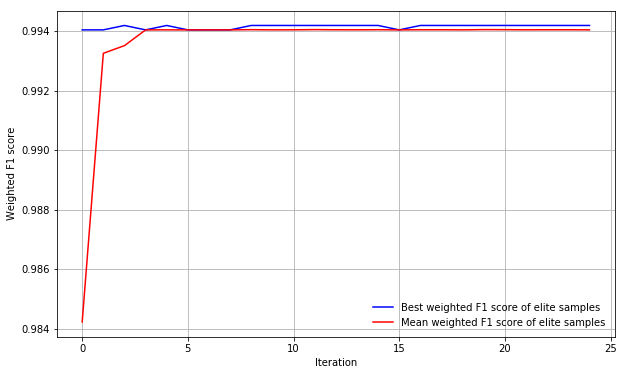

In [248]:

plt.figure(figsize=(10,6))
plt.plot(all_best_f1s[:25], 'b', label = 'Best weighted F1 score of elite samples')
plt.plot(all_mean_f1s[:25], 'r', label = 'Mean weighted F1 score of elite samples')
plt.xlabel('Iteration')
plt.ylabel('Weighted F1 score')
plt.legend(frameon=False)
plt.grid(True)
plt.savefig('../img/weighed_F1_iteration(1-10).eps',format='eps')

测试集

In [226]:
y_test_pred_proba_all = []
for model in models:
    model_name = model.__class__.__name__
    y_test_pred_proba = model.predict_proba(X_test)
    y_test_pred = model.predict(X_test)
    print("model_name: %s, test accuracy:%f, weighted f1 score:%f" %(model_name, accuracy_score(y_test, y_test_pred), f1_score(y_test, y_test_pred, average="weighted")))
    y_test_pred_proba_all.append(y_test_pred_proba)
    
    
y_test_pred_ensemble_proba = np.zeros((len(y_test), 6)) # 集成器概率向量

# 为每一个基学习器乘上权重
for k in range(classifier_num):
    y_test_pred_ensemble_proba += y_test_pred_proba_all[k] * best_weight[k]
y_test_pred_ensemble = np.argmax(y_test_pred_ensemble_proba, axis=1)

print(classification_report(y_test, y_test_pred_ensemble, digits=4))

cm = confusion_matrix(y_test, y_test_pred_ensemble)
i=0
acc_all = np.zeros(6)
for c in cm:
    acc_all[i] = c[i]/np.sum(c)
    print("%d accuaracy: %f" %(i+1, acc_all[i]))
    i=i+1
print("acc:", np.sum(y_test == y_test_pred_ensemble)/y_test_pred_ensemble.shape[0])
print('f1_weighted', f1_score(y_test, y_test_pred_ensemble, average='weighted'))

model_name: LogisticRegression, test accuracy:0.670980, weighted f1 score:0.620574
model_name: LinearDiscriminantAnalysis, test accuracy:0.625019, weighted f1 score:0.576099


/Users/alex/anaconda3/envs/gc/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[ 2018-12-18 00:13:46,078][cascade_classifier.transform] X_groups_test.shape=[(6723, 4)]
[ 2018-12-18 00:13:46,080][cascade_classifier.transform] group_dims=[4]
[ 2018-12-18 00:13:46,081][cascade_classifier.transform] X_test.shape=(6723, 4)
[ 2018-12-18 00:13:46,083][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(6723, 4)


model_name: SVC, test accuracy:0.895880, weighted f1 score:0.894545
model_name: DecisionTreeClassifier, test accuracy:0.970400, weighted f1 score:0.970527
model_name: ExtraTreeClassifier, test accuracy:0.895285, weighted f1 score:0.895450
model_name: GaussianNB, test accuracy:0.824037, weighted f1 score:0.822296
model_name: KNeighborsClassifier, test accuracy:0.897813, weighted f1 score:0.897799
model_name: RandomForestClassifier, test accuracy:0.976052, weighted f1 score:0.976184
model_name: ExtraTreesClassifier, test accuracy:0.962517, weighted f1 score:0.962632


[ 2018-12-18 00:13:46,252][cascade_classifier.transform] [layer=1] look_indexs=[0], X_cur_test.shape=(6723, 52)
[ 2018-12-18 00:13:46,433][cascade_classifier.transform] [layer=2] look_indexs=[0], X_cur_test.shape=(6723, 52)
[ 2018-12-18 00:13:46,602][cascade_classifier.transform] [layer=3] look_indexs=[0], X_cur_test.shape=(6723, 52)
[ 2018-12-18 00:13:46,772][cascade_classifier.transform] [layer=4] look_indexs=[0], X_cur_test.shape=(6723, 52)
[ 2018-12-18 00:13:46,941][cascade_classifier.transform] [layer=5] look_indexs=[0], X_cur_test.shape=(6723, 52)
[ 2018-12-18 00:13:47,112][cascade_classifier.transform] X_groups_test.shape=[(6723, 4)]
[ 2018-12-18 00:13:47,114][cascade_classifier.transform] group_dims=[4]
[ 2018-12-18 00:13:47,114][cascade_classifier.transform] X_test.shape=(6723, 4)
[ 2018-12-18 00:13:47,116][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(6723, 4)
[ 2018-12-18 00:13:47,279][cascade_classifier.transform] [layer=1] look_indexs=[0], X_cu

model_name: GCForest, test accuracy:0.976350, weighted f1 score:0.976472
             precision    recall  f1-score   support

          0     0.9082    0.9939    0.9491       488
          1     0.9927    0.9759    0.9842      2655
          2     0.9835    0.9801    0.9818      1760
          3     0.9779    0.9698    0.9738      1094
          4     0.9327    0.9327    0.9327       297
          5     0.9594    0.9907    0.9748       429

avg / total     0.9770    0.9763    0.9765      6723

1 accuaracy: 0.993852
2 accuaracy: 0.975895
3 accuaracy: 0.980114
4 accuaracy: 0.969835
5 accuaracy: 0.932660
6 accuaracy: 0.990676
acc: 0.9763498438197233
f1_weighted 0.9764717843100634


In [227]:
# np.save("../npy/CE_best_weights(1-10).npy", best_weight)
# np.save("../npy/CE_best_mu(1-10).npy", mu)
# np.save("../npy/CE_best_sigma(1-10).npy", sigma)
# import picklex
# for model in models:
#     model_name = model.__class__.__name__
#     with open("../pkl/CE_" + model_name + ".pkl", "wb") as f:
#         pickle.dump(model, f, pickle.HIGHEST_PROTOCOL)

# plot errbar on validation set

In [228]:
for ii in range(train_step):
    # 在验证集集上: 训练每个基学习器的投票参数
    print("No. Exp.: %d" %(ii))
    for i in range(max_iteration):
        # print("Iteration: %d" %(i))
        # 该次迭代的所有种群们
        population_score = np.zeros(population_num)
        population_weights = np.zeros((population_num, classifier_num))
        # 该次迭代的优势种群们
        population_retain_score = np.zeros(retain_population_num)
        population_retain_weights = np.zeros((retain_population_num, classifier_num))

        # 生成所有种群
        for j in range(classifier_num):
            w = np.random.normal(mu[j], sigma[j]+700/(i+1), population_num)
            # w = np.random.normal(mu[j], sigma[j], population_num)
            population_weights[:,j] = w

        # 映射所有种群的权重至[0:1]    
        for j in range(population_num):
            w2 = np.zeros(classifier_num)
            for k in range(classifier_num):
                w2[k] = np.exp(-population_weights[j][k]*population_weights[j][k])
                # w2[k] = np.exp(population_weights[j][k])/np.sum(np.exp(population_weights[j]))
            population_weights[j] = w2

        # 计算所有种群得分
        for j in range(population_num):
            y_pred_ensemble_proba = np.zeros((len(y_valid), 6)) # 集成器概率向量
            # 为每一个基学习器乘上权重
            for k in range(classifier_num):
                y_pred_ensemble_proba += y_pred_proba_all[k] * population_weights[j][k]
            y_pred_ensemble = np.argmax(y_pred_ensemble_proba, axis=1)
            f1 = f1_score(y_valid, y_pred_ensemble, average="weighted")
            population_score[j] = f1

        # 所有种群得分按降序排列
        retain_index = np.argsort(-np.array(population_score))[:retain_population_num]

        # 记录该次迭代中的优势种群们
        population_retain_weights = population_weights[retain_index]
        population_retain_score = np.array(population_score)[retain_index]

        # 记录每次迭代最好的种群和value，以及精英种群中的平均value
        all_best_weights[i] = population_retain_weights[0] # i次迭代，精英种群中具有最高value的权重
        all_best_f1s[i] = population_retain_score[0] # i次迭代，精英种群中最高的value
        all_mean_f1s[i] = np.mean(population_retain_score) # i次迭代，精英种群中的平均value
        # 更新mu，sigma为优势种群们的分布
        mu = np.mean(population_retain_weights, axis = 0)
        sigma = np.std(population_retain_weights, axis = 0) #default: ddof = 0, The divisor used in calculations is N - ddof
    best_f1 = np.max(all_best_f1s)
    print("Best f1 of %d iterations: %f" % (max_iteration, best_f1))
    all_best_f1s_mean[ii] = np.mean(all_best_f1s)
    all_best_f1s_std[ii] = np.std(all_best_f1s)
    all_mean_f1s_mean[ii] = np.mean(all_mean_f1s)
    all_mean_f1s_std[ii] = np.std(all_mean_f1s)

Train step: 0


/Users/alex/anaconda3/envs/gc/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Best f1 of 50 iterations: 0.994201
Train step: 1
Best f1 of 50 iterations: 0.994201
Train step: 2
Best f1 of 50 iterations: 0.994201
Train step: 3
Best f1 of 50 iterations: 0.994201
Train step: 4
Best f1 of 50 iterations: 0.994201
Train step: 5
Best f1 of 50 iterations: 0.994201
Train step: 6
Best f1 of 50 iterations: 0.994201
Train step: 7
Best f1 of 50 iterations: 0.994201
Train step: 8
Best f1 of 50 iterations: 0.994201
Train step: 9
Best f1 of 50 iterations: 0.994201
Train step: 10
Best f1 of 50 iterations: 0.994201
Train step: 11
Best f1 of 50 iterations: 0.994201
Train step: 12
Best f1 of 50 iterations: 0.994201
Train step: 13
Best f1 of 50 iterations: 0.994201
Train step: 14
Best f1 of 50 iterations: 0.994201
Train step: 15
Best f1 of 50 iterations: 0.994201
Train step: 16
Best f1 of 50 iterations: 0.994201
Train step: 17
Best f1 of 50 iterations: 0.994201
Train step: 18
Best f1 of 50 iterations: 0.994201
Train step: 19
Best f1 of 50 iterations: 0.994201
Train step: 20
Best f1 o

In [229]:
all_best_f1s_mean
all_mean_f1s_mean

array([0.9938263 , 0.99385581, 0.9937371 , 0.99385489, 0.99355191,
       0.99388237, 0.99370246, 0.99330185, 0.993608  , 0.9938415 ,
       0.99365432, 0.9937485 , 0.99386146, 0.99390078, 0.99382285,
       0.99379969, 0.99387966, 0.99384458, 0.99391635, 0.9933999 ,
       0.99371678, 0.99379722, 0.99385598, 0.99363856, 0.99358165,
       0.99363234, 0.9937758 , 0.99387278, 0.99375353, 0.99333984,
       0.99373866, 0.99388772, 0.99364195, 0.99350308, 0.99349052,
       0.99380994, 0.9938632 , 0.99382322, 0.99381544, 0.9935416 ,
       0.99362166, 0.99342836, 0.99382879, 0.99377766, 0.99383976,
       0.99387093, 0.99356642, 0.99379875, 0.99373755, 0.99372194,
       0.99386467, 0.99360041, 0.99371135, 0.99384157, 0.99375958,
       0.9936416 , 0.99387362, 0.99384809, 0.99365571, 0.99386924,
       0.9936016 , 0.99386509, 0.99349375, 0.99349955, 0.9935016 ,
       0.9937733 , 0.99387301, 0.99381979, 0.99382306, 0.99365665,
       0.9938748 , 0.99383234, 0.99350998, 0.99374295, 0.99387

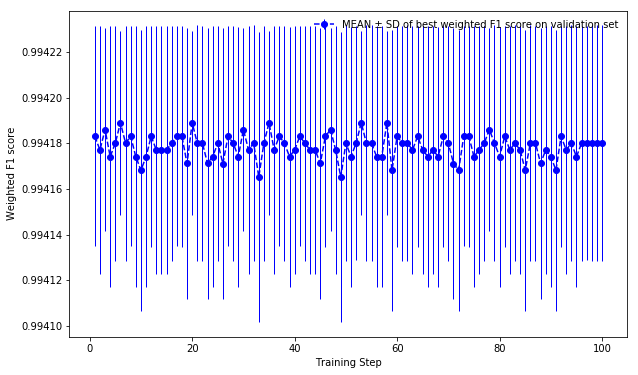

In [251]:
plt.figure(figsize=(10,6))
plt.errorbar(np.arange(train_step)+1, all_best_f1s_mean, yerr=all_best_f1s_std, fmt="--bo", elinewidth=1,
            label = 'MEAN ± SD of best weighted F1 score on validation set')
plt.xlabel('Training Step')
plt.ylabel('Weighted F1 score')
plt.legend(frameon=False)
plt.savefig('../img/MEANSD_of_best.eps',format='eps')

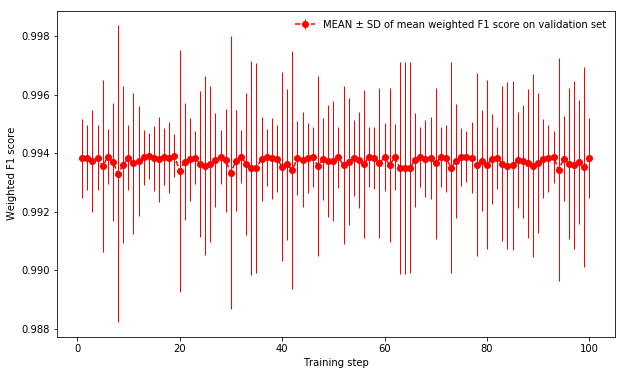

In [252]:
plt.figure(figsize=(10,6))
plt.errorbar(np.arange(train_step)+1, all_mean_f1s_mean, yerr=all_mean_f1s_std, fmt="--ro", elinewidth=1,
            label = 'MEAN ± SD of mean weighted F1 score on validation set')
plt.xlabel('Training step')
plt.ylabel('Weighted F1 score')

plt.savefig('../img/MEANSD_of_mean.eps',format='eps')
plt.legend(frameon=False)